# Quantity Prediction Model for Retail Store
### (To overcome inventory problem )

### Importing necessary Libraries for project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing and loading required dataset for analysis

In [2]:
prod = pd.read_excel("Combined.xlsx", sheet_name = "Product Master")

In [3]:
prod

,Product,Category
0,Product153,Category3
1,Product167,Category3
2,Product163,Category3
3,Product139,Category3
4,Product170,Category3
...,...,...
177,Product72,Category2
178,Product49,Category2
179,Product50,Category2
180,Product51,Category2


In [4]:
cal = pd.read_excel("Combined.xlsx", sheet_name = "Promo Calendar")
cal

,Week,PromoID
0,2015-01-05,No Promo
1,2015-01-12,No Promo
2,2015-01-19,No Promo
3,2015-01-26,No Promo
4,2015-02-02,No Promo
...,...,...
116,2017-03-27,No Promo
117,2017-04-03,No Promo
118,2017-04-10,No Promo
119,2017-04-17,No Promo


In [6]:
sales = pd.read_excel("Combined.xlsx", sheet_name = "Sales_Data")
sales

,datekey,Product,Store,Quantity
0,20150101,Product103,Store25,1
1,20150101,Product103,Store4,1
2,20150101,Product105,Store12,-1
3,20150101,Product105,Store2,1
4,20150101,Product105,Store25,1
...,...,...,...,...
793379,20161231,Product99,Store27,1
793380,20061231,Product99,Store27,-1
793381,20161231,Product99,Store28,-1
793382,20161231,Product99,Store5,1


In [7]:
store = pd.read_excel("Combined.xlsx", sheet_name = "Store Master")
store

,Store,Geography
0,Store13,SOUTH
1,Store20,NORTHEAST
2,Store22,NORTHEAST
3,Store23,MIDWEST
4,Store27,SOUTH
5,Store9,SOUTH
6,Store12,NORTHEAST
7,Store21,SOUTH
8,Store14,SOUTH
9,Store16,SOUTH


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793384 entries, 0 to 793383
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   datekey   793384 non-null  object
 1   Product   793384 non-null  object
 2   Store     793384 non-null  object
 3   Quantity  793384 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 24.2+ MB


### Changing data type for Date to required format of pandas for timeseries analysis

In [9]:
sales['datekey'] = pd.to_datetime(sales['datekey'], format='%Y%m%d', errors='coerce')
sales['datekey']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
793379   2016-12-31
793380   2006-12-31
793381   2016-12-31
793382   2016-12-31
793383   2016-12-31
Name: datekey, Length: 793384, dtype: datetime64[ns]

### Summary of Dataset

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793384 entries, 0 to 793383
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datekey   793380 non-null  datetime64[ns]
 1   Product   793384 non-null  object        
 2   Store     793384 non-null  object        
 3   Quantity  793384 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 24.2+ MB


In [11]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   182 non-null    object
 1   Category  182 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [12]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      30 non-null     object
 1   Geography  30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes


In [13]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Week     121 non-null    datetime64[ns]
 1   PromoID  121 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ KB


### Treating null and outliers

<Axes: xlabel='Quantity', ylabel='Density'>

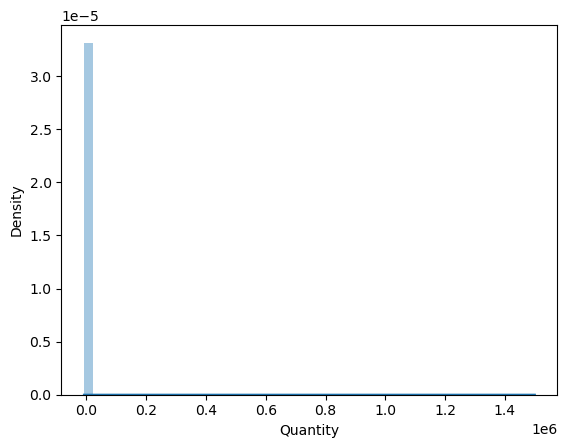

In [14]:
sns.distplot(sales['Quantity'])

<Axes: >

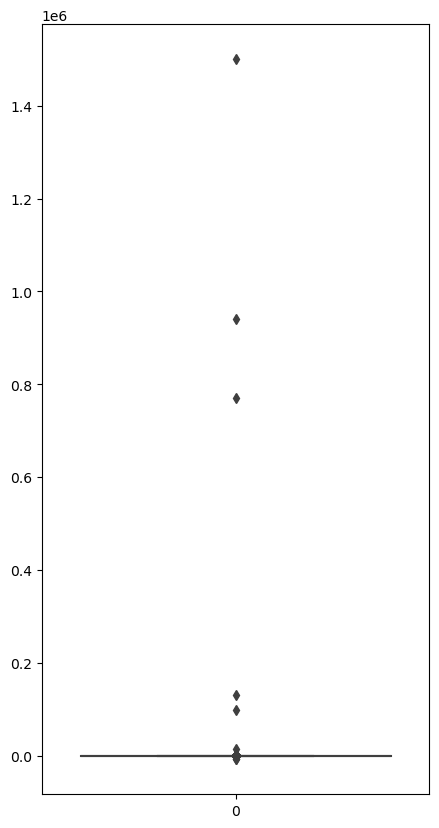

In [15]:
plt.figure(figsize = (5,10))

sns.boxplot(data = sales['Quantity'])

In [17]:
sales.describe()

,Quantity
count,7.933840e+05
mean,5.239488e+00
std,2.175663e+03
min,-8.100000e+03
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.500000e+06


#### Note: As you can see, outliers are way too much out of the range. Even if we consider the IQR method to handle the outliers of the Quantity in the sales dataset, Q3-Q1 gives IQR=0. With such a method, the information in the Quantity data will change drastically, so handling outliers with the IQR method is not a good decision to go with.

## Let's see the Z-Score method to handle outliers.

In [18]:
from scipy import stats

In [19]:
data = np.array(sales['Quantity'])

In [20]:
z_scores = np.abs(stats.zscore(data))

In [21]:
threshold = 1

In [22]:
outlier_indices = np.where(z_scores > threshold)

In [23]:
outliers = data[outlier_indices]

In [24]:
print("Outlier Values:", outliers)
print("Outlier Indices:", outlier_indices[0])

Outlier Values: [ 941266 1500000   97117  130000   13000   -7500  770000   -8100]
Outlier Indices: [  5862  58642  99998 370008 370071 370491 370689 372944]


### Here we will replace the outliers by median and not using the mean of the quantity, as the mean of the column will be highly affected by outliers present in our dataset.

In [25]:
med = np.median(sales['Quantity'])

In [26]:
data[outlier_indices] = med

In [27]:
print("Data with Outliers Replaced:", data)

Data with Outliers Replaced: [ 1  1 -1 ... -1  1  1]


In [28]:
sales['Quantity'] = data

In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793384 entries, 0 to 793383
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datekey   793380 non-null  datetime64[ns]
 1   Product   793384 non-null  object        
 2   Store     793384 non-null  object        
 3   Quantity  793384 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 24.2+ MB


In [30]:
sales.shape

(793384, 4)

#### Deleting Null data points

In [31]:
nullindex = (sales[sales['datekey'].isnull() == True]).index
nullindex

Int64Index([11048, 287052, 289366, 641161], dtype='int64')

In [32]:
sales.dropna(inplace=True)

In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793380 entries, 0 to 793383
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datekey   793380 non-null  datetime64[ns]
 1   Product   793380 non-null  object        
 2   Store     793380 non-null  object        
 3   Quantity  793380 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 30.3+ MB


### Joining all the dataset in a one table for EDA

In [34]:
all_data = sales.merge(store, on = 'Store', how = 'left')
all_data

,datekey,Product,Store,Quantity,Geography
0,2015-01-01,Product103,Store25,1,MIDWEST
1,2015-01-01,Product103,Store4,1,MIDWEST
2,2015-01-01,Product105,Store12,-1,NORTHEAST
3,2015-01-01,Product105,Store2,1,SOUTH
4,2015-01-01,Product105,Store25,1,MIDWEST
...,...,...,...,...,...
793375,2016-12-31,Product99,Store27,1,SOUTH
793376,2006-12-31,Product99,Store27,-1,SOUTH
793377,2016-12-31,Product99,Store28,-1,MIDWEST
793378,2016-12-31,Product99,Store5,1,SOUTH


In [35]:
all_data = all_data.merge(prod, on = "Product", how = "left")
all_data

,datekey,Product,Store,Quantity,Geography,Category
0,2015-01-01,Product103,Store25,1,MIDWEST,Category3
1,2015-01-01,Product103,Store4,1,MIDWEST,Category3
2,2015-01-01,Product105,Store12,-1,NORTHEAST,Category3
3,2015-01-01,Product105,Store2,1,SOUTH,Category3
4,2015-01-01,Product105,Store25,1,MIDWEST,Category3
...,...,...,...,...,...,...
793375,2016-12-31,Product99,Store27,1,SOUTH,Category3
793376,2006-12-31,Product99,Store27,-1,SOUTH,Category3
793377,2016-12-31,Product99,Store28,-1,MIDWEST,Category3
793378,2016-12-31,Product99,Store5,1,SOUTH,Category3


In [36]:
conditions = [
    (all_data['datekey'] >= '2015-02-09') & (all_data['datekey'] <= '2015-02-15'),
    (all_data['datekey'] >= '2015-03-16') & (all_data['datekey'] <= '2015-03-22'),
    (all_data['datekey'] >= '2015-05-04') & (all_data['datekey'] <= '2015-05-10'),
    (all_data["datekey"] >= '2015-06-01') & (all_data["datekey"] <= '2015-06-14'),
    (all_data["datekey"] >= '2015-06-29') & (all_data["datekey"] <= '2015-07-12'),
    (all_data["datekey"] >= '2015-09-14') & (all_data["datekey"] <= '2015-09-20'),
    (all_data["datekey"] >= '2015-09-28') & (all_data["datekey"] <= '2015-10-18'),
    (all_data["datekey"] >= '2015-12-21') & (all_data["datekey"] <= '2016-01-03'),
    (all_data["datekey"] >= '2016-02-08') & (all_data["datekey"] <= '2016-02-14'),
    (all_data["datekey"] >= '2016-03-28') & (all_data["datekey"] <= '2016-04-03'),
    (all_data["datekey"] >= '2016-05-02') & (all_data["datekey"] <= '2016-05-08'),
    (all_data["datekey"] >= '2016-06-06') & (all_data["datekey"] <= '2016-06-19'),
    (all_data["datekey"] >= '2016-07-04') & (all_data["datekey"] <= '2016-07-17'),
    (all_data["datekey"] >= '2016-08-15') & (all_data["datekey"] <= '2016-08-28'),
    (all_data["datekey"] >= '2016-09-12') & (all_data["datekey"] <= '2016-09-18'),
    (all_data["datekey"] >= '2016-10-03') & (all_data["datekey"] <= '2016-10-23'),
    (all_data["datekey"] >= '2016-12-26') & (all_data["datekey"] <= '2016-12-31')
]

promo_values = ['Promo10', 'Promo5', 'Promo1', 'Promo2', 'Promo3', 'Promo11', 'Promo3', 'Promo4', 'Promo10', 'Promo5',
               'Promo1', 'Promo2', 'Promo3', 'Promo6', 'Promo7', 'Promo8', 'Promo4']

all_data['PromoID'] = np.select(conditions, promo_values, default='No Promo')

In [37]:
all_data

,datekey,Product,Store,Quantity,Geography,Category,PromoID
0,2015-01-01,Product103,Store25,1,MIDWEST,Category3,No Promo
1,2015-01-01,Product103,Store4,1,MIDWEST,Category3,No Promo
2,2015-01-01,Product105,Store12,-1,NORTHEAST,Category3,No Promo
3,2015-01-01,Product105,Store2,1,SOUTH,Category3,No Promo
4,2015-01-01,Product105,Store25,1,MIDWEST,Category3,No Promo
...,...,...,...,...,...,...,...
793375,2016-12-31,Product99,Store27,1,SOUTH,Category3,Promo4
793376,2006-12-31,Product99,Store27,-1,SOUTH,Category3,No Promo
793377,2016-12-31,Product99,Store28,-1,MIDWEST,Category3,Promo4
793378,2016-12-31,Product99,Store5,1,SOUTH,Category3,Promo4


In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793380 entries, 0 to 793379
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datekey    793380 non-null  datetime64[ns]
 1   Product    793380 non-null  object        
 2   Store      793380 non-null  object        
 3   Quantity   793380 non-null  int64         
 4   Geography  793380 non-null  object        
 5   Category   793380 non-null  object        
 6   PromoID    793380 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 48.4+ MB


In [39]:
all_data.describe()

,Quantity
count,793380.000000
mean,0.908954
std,2.057952
min,-1000.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,200.000000


#### Here you can see the mean is colsed to median because we have replaced the outliers with median of the Quantity.

#### There are some extreme year data in our dataset. So we will delete them as those values will be irrelevant for future Time Series Analysis

In [40]:
index_to_delete = all_data[all_data['datekey'] == '17-12-2005  00:00:00'].index
index_to_delete

Int64Index([289372], dtype='int64')

In [41]:
all_data = all_data.drop(index_to_delete)

In [42]:
index_to_delete = all_data[all_data['datekey'] == '31-12-2006  00:00:00'].index
index_to_delete

Int64Index([793376], dtype='int64')

In [43]:
all_data = all_data.drop(index_to_delete)

In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793378 entries, 0 to 793379
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datekey    793378 non-null  datetime64[ns]
 1   Product    793378 non-null  object        
 2   Store      793378 non-null  object        
 3   Quantity   793378 non-null  int64         
 4   Geography  793378 non-null  object        
 5   Category   793378 non-null  object        
 6   PromoID    793378 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 48.4+ MB


In [46]:
all_data.to_excel("all_data3.xlsx")